<a href="https://colab.research.google.com/github/KangHyeonGu1/-/blob/main/%ED%98%90%EC%98%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
import scipy.stats as stats
import seaborn as sns

In [3]:
data=pd.read_csv('혐오.csv')
data.head

<bound method NDFrame.head of       Unnamed: 0       q1s       q2s       q3s       q4s  q5s    q6s
0              1  2.615385  3.111111  2.090909  3.000000  2.8  1.000
1              2  2.000000  2.555556  1.727273  3.714286  4.0  3.625
2              3  2.615385  3.000000  2.090909  3.571429  1.0  1.875
3              4  2.846154  3.111111  2.727273  4.000000  1.9  1.000
4              5  2.307692  2.000000  2.181818  4.000000  2.9  1.000
...          ...       ...       ...       ...       ...  ...    ...
5404        5897  1.000000  5.000000  4.909091  5.000000  1.0  3.000
5405        5898  1.076923  1.222222  1.000000  3.571429  1.0  1.000
5406        5910  1.000000  4.222222  3.090909  4.285714  2.2  1.000
5407        5912  3.153846  2.333333  4.545455  4.000000  3.5  1.500
5408        5913  2.461538  2.000000  2.000000  3.000000  1.2  2.875

[5409 rows x 7 columns]>

In [4]:
rm = ols(' q2s~ q5s', data=data).fit()
rm.summary()
rm.params

Intercept    2.331538
q5s          0.291793
dtype: float64

In [5]:
rm = ols(' q3s~ q5s', data=data).fit()
rm.summary()
rm.params

Intercept    1.889092
q5s          0.247065
dtype: float64

In [6]:
rm = ols(' q4s~ q5s', data=data).fit()
rm.summary()
rm.params

Intercept    3.274848
q5s          0.205027
dtype: float64

In [7]:
rm = ols(' q4s~ q5s + q2s + q3s', data=data).fit()
rm.summary()
rm.params

Intercept    2.940687
q5s          0.162478
q2s          0.087876
q3s          0.068432
dtype: float64

In [8]:
ones=np.ones(shape=(5409,3))
def dc(a,b):          
  c=a*b
  sum=c.sum()
  return sum

In [14]:
def freg(data):
  xx=data['q5s']
  xdf=pd.DataFrame({'xx':xx-0.5,'b':xx,'c':xx+0.5})
  x=xdf.to_numpy()
  mm1=data['q2s']
  m1df=pd.DataFrame({'a':mm1-0.5,'b':mm1,'c':mm1+0.5})
  m1=m1df.to_numpy()
  mm2=data['q3s']
  m2df=pd.DataFrame({'a':mm2-0.5,'b':mm2,'c':mm2+0.5})
  m2=m2df.to_numpy()
  yy=data['q4s']
  ydf=pd.DataFrame({'a':yy-0.5,'b':yy,'c':yy+0.5})
  y=ydf.to_numpy()
  xtx=np.zeros(shape=(2,2))
  xlist=[ones,x]
  for i in range(0,2):    
    for j in range(0,2):
      xtx[i,j]= dc(xlist[i],xlist[j])
  xtm1=np.zeros(shape=(2,1))
  for i in range(0,2):    
    for j in range(0,1):
      xtm1[i,j]= dc(xlist[i],m1)
  lxtx=np.linalg.inv(xtx)
  b1=lxtx@xtm1
  b1=np.around(b1, decimals=4)
  xtm2=np.zeros(shape=(2,1))
  for i in range(0,2):    
    for j in range(0,1):
      xtm2[i,j]= dc(xlist[i],m2)
  b2=lxtx@xtm2
  b2=np.around(b2, decimals=4)
  xtx3=np.zeros(shape=(4,4))
  xlist2=[ones,x,m1,m2]
  for i in range(0,4):    
    for j in range(0,4):
      xtx3[i,j]= dc(xlist2[i],xlist2[j])
  xty=np.zeros(shape=(4,1))
  for i in range(0,4):    
    for j in range(0,1):
      xty[i,j]= dc(xlist2[i],y)
  lxtx3=np.linalg.inv(xtx3)
  b3=lxtx3@xty
  b3=np.around(b3, decimals=4)
  return b1,b2,b3

In [15]:
xx=data['q5s']
xdf=pd.DataFrame({'xx':xx-0.5,'b':xx,'c':xx+0.5})
x=xdf.to_numpy()
mm1=data['q2s']
m1df=pd.DataFrame({'a':mm1-0.5,'b':mm1,'c':mm1+0.5})
m1=m1df.to_numpy()
mm2=data['q3s']
m2df=pd.DataFrame({'a':mm2-0.5,'b':mm2,'c':mm2+0.5})
m2=m2df.to_numpy()
yy=data['q4s']
ydf=pd.DataFrame({'a':yy-0.5,'b':yy,'c':yy+0.5})
y=ydf.to_numpy()

In [24]:
para=freg(data)
para

(array([[2.0929],
        [0.3894]]), array([[1.6354],
        [0.3509]]), array([[2.5294],
        [0.2198],
        [0.1275],
        [0.1288]]))

In [22]:
# sea와 seb
x_m=x.sum(axis=0)/5409
d2=(x-x_m)**2
sd=np.sqrt(d2.sum()/5408)
sd
sea=sd/np.sqrt(5409)

m_m1=m1.sum(axis=0)/5409
d2b1=(m1-m_m1)**2
sdb1=np.sqrt(d2b1.sum()/5408)
sdb1
seb1=sdb1/np.sqrt(5409)

m_m2=m2.sum(axis=0)/5409
d2b2=(m2-m_m2)**2
sdb2=np.sqrt(d2b2.sum()/5408)
sdb2
seb2=sdb2/np.sqrt(5409)
seb2
print(sea,seb1,seb2)

0.024045165469174658 0.024677861029290933 0.02252534598053947


In [26]:
# seab1  seab2
seab1=np.sqrt((para[0][1]**2*seb1**2)+ (para[2][2]**2*sea**2) + (sea**2*seb1**2) )
seab2=np.sqrt((para[1][1]**2*seb2**2)+ (para[2][3]**2*sea**2) + (sea**2*seb2**2) )
print(seab1,seab2)

[0.01010419] [0.00850649]


In [28]:
# ab1의 95% 신뢰구간과 z값 검정
ab1=para[0][1]*para[2][2]
CI=[ab1-1.96*seab1,ab1+1.96*seab1]
z1=ab1/seab1
p1 = 2 * (1 - stats.norm.cdf(np.abs(z1)))
print(CI,p1)

[array([0.02984429]), array([0.06945271])] [8.93936136e-07]


In [29]:
# ab2의 95% 신뢰구간과 z값 검정
ab2=para[1][1]*para[2][3]
CI2=[ab2-1.96*seab2,ab2+1.96*seab2]
z2=ab2/seab2
p2 = 2 * (1 - stats.norm.cdf(np.abs(z2)))
print(CI2,p2)

[array([0.0285232]), array([0.06186864])] [1.07769591e-07]


In [30]:
#부트스트랩 표본
a1=[None]*5000
a2=[None]*5000
b1=[None]*5000
b2=[None]*5000
c=[None]*5000
for i in range(0,5000):
  new_data=data.sample(n=5409,replace=True)
  parameters=freg(new_data)
  a1[i]= parameters[0][1]
  a2[i]= parameters[1][1]
  c[i]= parameters[2][1]
  b1[i]= parameters[2][2]
  b2[i]= parameters[2][3]


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


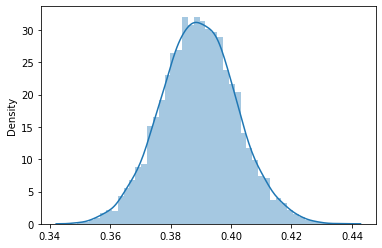

In [33]:
sns.distplot(a1)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


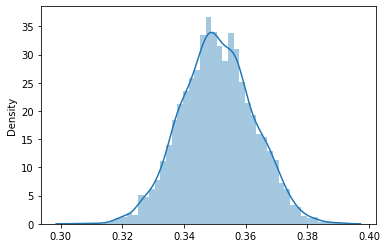

In [34]:
sns.distplot(a2)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


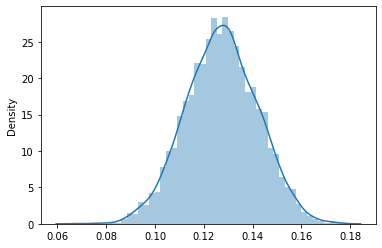

In [35]:
sns.distplot(b1)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


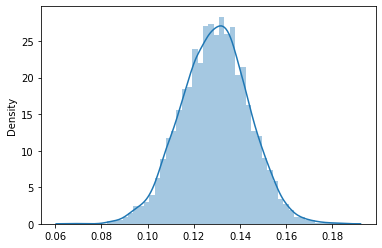

In [36]:
sns.distplot(b2)